# Welcome to the Demo!

Hello there! Welcome to the demo of TweetCaster! This section will guide you on how to use our project and see it in action on a small dataset (don't worry, we have done most of the dataset heavylifting for you). But before we move forward with that, we would highly recommend you to open this notebook in Google Colab. There are certain features (like downloading datasets) that might work only on that platform. Having said this, let's begin!

## Step 1: Download the dependencies
There are a set of libraries that might need to be downloaded and installed and a bunch of other libraries that you might just need to import. To do this, just run the two cells we have provided in the Project Setup section. They will automatically install everything for you while you just sit back enjoy the satisfying scene of a moving progress bar. :)

## Step 2: Pre-process the dataset
The dataset will need to be pre-processed before we can show you the magic of TweetCaster. This will hydrate the dataset and also get rid of any not-so-useful hashtags or retweet tags that Twitter occassionally adds in the tweet body. Just run the cells in dataset preparation starting from top going to the bottom one by one and you should be on your way to trying out our very first experiment. This section also has a helper that we use to show you pretty charts in our notebook.

## Step 3: Tweet Sentiment Analysis
You would need to run sentiment analysis on the tweets loaded in the dataset. This is a crucial datapoint for our project and MUST NOT be skipped for error-free run. Execute all cells in Tweet Sentiment Analysis section starting from top going all the way to the bottom one by one. Getting the subjectivity and polarity, in our experience, takes about 2 - 3 minutes. Please be patient while it runs - coffee break! Once everything is done executing, you might see a couple of graphs pop up. One of them tells you the sentiment distribution in our dataset and the other one will show you the prominent words through a word cloud.

## Step 4: Adding Step 3 Results to Dataset
Alright, this is the last boring section, I promise! All you need to do is execute the cells in the given order in the Dataset Pre-processing after Sentiment Analysis section.

## Step 5: Experimentation, Evaluation, and a Cup of Tea (OPTIONAL)
This section just shows all the approaches we tried and displays the RMSE returned by each. This step is completely optional and MAY BE SKIPPED if you would like to go directly to our main approach.

### Step 5a: Regression using Sentiment Analysis (OPTIONAL)
We have set up this section to run linear regression on the input and display the graph of predictions and true case numbers. At the end of the section, the root mean squared error (RMSE) value is also printed. Be sure to execute all cells in this section in the given order to see the expected results.

### Step 5b: Time Series Models (OPTIONAL)
We implemented some time series models for you to check out. As of now, we have ARIMA, OLS, an ensemble of the two methods and an ensemble of the two with the linear regression model from Step 5a loaded in. You may start from the top and work your way to the bottom. Each subsection will display the prediction and true values graph and print out the RMSE value.

### Step 5c: Neural Network with Tweet Metadata and Sentiment Analysis (OPTIONAL)
We implemented the neural network we suggest in our report with just the tweet metadata and sentiment analysis data. We have already pre-loaded all the hyper-parameters for you so that you can just hit the execute button on all the cells in this section and watch everything run.

## Step 6: Tweet Vectorization (REQUIRED)
The next section involves tweet vectorization. Simply run all the cells in Tweet Vectorization section and you should be good to go.
<b>Important:</b> If you would like to use the TF-IDF embeddings, be sure to set the TF-IDF `MAX_FEATURES` variable to the maximum number of features you would like to see. We have tested it with 200 and 500 features.

### Step 5d: Neural Netowrk with Tweet Encoding Only (OPTIONAL)
While playing around with the data, we implemented the neural network on the tweet encoding data as well. This section does not assume access to the tweet metadata or its sentiment value. Feel free to run this section entirely if you would like to see how well does the model perform without rest of the data we have gathered so far. Apart from the usual data, you may also see a smoothed graph. This graph is just a 5-days moving average of the graph you were seeing earlier.

## Step 7: TweetCaster - Neural Network with Tweet Encoding, Metadata and Sentiment Values (MAIN APPROACH)
This is the main approach of our work. You may play around with the embedding we use for this part. Please read the note in the section to see exactly how to change between embedding. As of now, we have it set to execute everything using BERTweet embedding. We currently have it set to also train four models (with different sizes of the rolling window), but the code block with show just one set of graphs (for the rolling window of 7 days, since it performs the best). Change the `qualifying_entry` to (`rolling_window_length`, 7) where `rolling_window_length` can take values of 7, 14, 21 and 28 will let you see the other graphs as well. Be sure to execute all the code blocks in this section in the given order to avoid any errors.

## Thank You for Checking Out TweetCaster!
Alright, that was all! Thanks for reading the demo, and I hope that you enjoyed checking out our project. Have a great day and Happy Holidays! :)

# Project Setup

This section mostly deals with setting up the project. This includes installing the dependencies and downloading the relevant datasets for analysis over the project.

In [1]:
import re
import torch
import warnings
import itertools
from math import sqrt

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as pyplot
from torch import nn

from textblob import TextBlob
from wordcloud import WordCloud
from tqdm import tqdm, trange
from google.colab import drive, files
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

!pip install transformers
!pip install emoji
from transformers import AutoModel, AutoTokenizer

!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

!pip install statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.regression.linear_model import OLS

warnings.filterwarnings('ignore')

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 61 kB 460 kB/s 
     |████████████████████████████████| 895 kB 41.2 MB/s 
     |████████████████████████████████| 596 kB 43.0 MB/s 
     |████████████████████████████████| 3.3 MB 32.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 170 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=0657fe0f3bf25b36294e6980baf415ed24042fdebeba0f280c8eef58c9634f1f
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 11.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Downloading raw data
# 1. Hydrated USA Tweets Dataset
!gdown --id 1YVnxh3rnmNb-7AWSoWpVxe24ms29nA3B

# 2. COVID-19 Cases Dataset
!wget "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"

Downloading...
From: https://drive.google.com/uc?id=1YVnxh3rnmNb-7AWSoWpVxe24ms29nA3B
To: /content/2021_usa_dataset_hydrated.tsv
100% 69.4M/69.4M [00:00<00:00, 148MB/s]
--2021-12-02 21:20:49--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17424 (17K) [text/plain]
Saving to: ‘us.csv’

us.csv              100%[===================>]  17.02K  --.-KB/s    in 0.001s  

2021-12-02 21:20:49 (24.5 MB/s) - ‘us.csv’ saved [17424/17424]



# Dataset Preparation

Once the dataset has been been downloaded, we need to preprocess it before it can be used by our approach. This preprocessing includes, hydrating the dataset (we pre-hydrated it, so we load it from a tsv file), cleaning up the tweets by getting rid of hashtags and retweets symbols, adding metadata to the tweet dataframe and calculating the number of new COVID-19 cases for the dataset retrieved from New York Times.

In [3]:
# Reading CSVs into dataframes
covid_df = pd.read_csv('us.csv')
usa_2021_df = pd.read_csv('2021_usa_dataset_hydrated.tsv',sep="\t", engine='python')

# Aggregated tweets to be used by BERTweet
usa_2021_agg_df = usa_2021_df.groupby('date')['text'].agg(','.join).reset_index()

In [4]:
# Preparing the Twitter dataset
def cleanTweets(tweet):
   # removing mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', str(tweet))
    # removing hashtags
    tweet = re.sub(r'#', '', str(tweet))
    # removing 'rt' or 'RT' from tweets
    tweet = re.sub(r'RT : ', '', str(tweet))
    # removing any tweets that include a link
    tweet = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', str(tweet))
    return tweet
# cleaning tweets
usa_2021_df['text'] = usa_2021_df['text'].apply(cleanTweets)
# adding two more features
usa_2021_df['day_of_week'] = pd.to_datetime(usa_2021_df['date']).dt.dayofweek
sunday_mask = usa_2021_df['day_of_week'] == 0
usa_2021_df['day_of_week'][sunday_mask] = 7
usa_2021_df['hour_of_day'] = pd.to_datetime(usa_2021_df['time']).dt.hour
usa_2021_df.sample(5)

,tweet_id,date,time,lang,country_place,text,day_of_week,hour_of_day
146058,1370004510026956807,2021-03-11,13:31:43,en,US,I’m so grateful every former US president stil...,3.0,13.0
163242,1373338146633617410,2021-03-20,18:18:24,en,US,I love seeing this. Florida is back to normal....,5.0,18.0
181469,1377283648127307777,2021-03-31,15:36:25,en,US,"""Pfizer says COVID-19 vaccine was 100% effecti...",2.0,15.0
22415,1348116984723075074,2021-01-10,03:58:30,en,US,“All of these numbers are leading to a lack of...,6.0,3.0
69577,1355151872357756928,2021-01-29,13:52:38,en,US,"Health care workers, stuck in the snow, gave c...",4.0,13.0


In [5]:
usa_2021_df.shape

(361756, 8)

1. Adding a new column with the number of new cases.

In [6]:
covid_df['new_cases'] = covid_df['cases'].diff()
covid_df['new_cases'][0] = covid_df['cases'][0]

covid_df

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
...,...,...,...,...
676,2021-11-27,48171232,777310,26433.0
677,2021-11-28,48195182,777417,23950.0
678,2021-11-29,48411494,779293,216312.0
679,2021-11-30,48520788,780848,109294.0


2. Getting data between March 01, 2021 and August 01, 2021.

In [7]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
mask = (covid_df['date'] >= '2021-03-01') & (covid_df['date'] <= '2021-08-22')
covid_df = covid_df[mask]

covid_df

,date,cases,deaths,new_cases
405,2021-03-01,28680857,514404,56696.0
406,2021-03-02,28738501,515710,57644.0
407,2021-03-03,28805113,518079,66612.0
408,2021-03-04,28872395,520028,67282.0
409,2021-03-05,28938090,522511,65695.0
...,...,...,...,...
575,2021-08-18,37298285,624365,164611.0
576,2021-08-19,37458037,626099,159752.0
577,2021-08-20,37657643,627631,199606.0
578,2021-08-21,37737034,628100,79391.0


Visualizer code for predictions

In [8]:
import matplotlib.pyplot as plt

def show_model_performance(y_pred, y_target, y_label="Predicted Case Numbers"):
    # print(y_pred)
    plt.plot(covid_df.date[-y_pred.shape[0]:], y_pred.detach().numpy(), label=y_label)
    print(covid_df.date[-y_pred.shape[0]:].shape)
    plt.plot(covid_df.date[-y_pred.shape[0]:], y_target.detach().numpy(), label="Actual Case Numbers")
    plt.legend()
    plt.show()

# Tweets Sentiment Analysis

Once the dataset is ready to be analyzed, we run sentiment analysis on all tweets to check for any relations between the general sentiment from the general public and the number of new COVID-19 cases.

In [9]:
def getSentSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getSentPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [10]:
usa_2021_df['subjectivity'] = usa_2021_df['text'].apply(getSentSubjectivity)
usa_2021_df['polarity'] = usa_2021_df['text'].apply(getSentPolarity)

In [11]:
# negative, nautral, positive analysis
def assignSentiment(subScore):
    if subScore < 0:
        return "Negative"
    elif subScore == 0:
        return "Neutral"
    else:
        return "Positive"

In [12]:
usa_2021_df['sentiment'] = usa_2021_df['polarity'].apply(assignSentiment)

In [13]:
pos_tweets = usa_2021_df[usa_2021_df['sentiment'] == 'Positive']
percent_pos_tweets = pos_tweets.shape[0]/usa_2021_df.shape[0] * 100
print("The percentage of positive tweets of the whole dataset is " + str(percent_pos_tweets) + "%")

The percentage of positive tweets of the whole dataset is 36.412112031313924%


Text(0, 0.5, 'Number of Tweets')

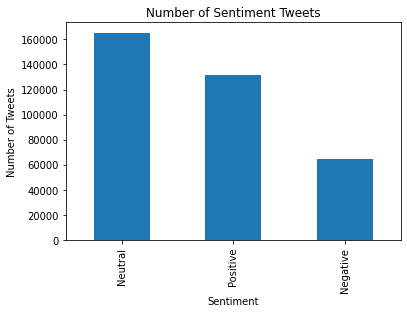

In [14]:
num_tweets = usa_2021_df['sentiment'].value_counts().plot.bar(title='Number of Sentiment Tweets', x='sentiment', y='num_tweets')
num_tweets.set_xlabel("Sentiment")
num_tweets.set_ylabel("Number of Tweets")

In [15]:
usa_2021_df['date'] = pd.to_datetime(usa_2021_df['date'])

In [16]:
months_pos_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
months_pos_nums = []
months_neg_nums = []
months_net_nums = []

for i in range(3, 9):
  temp_df = usa_2021_df[pd.to_datetime(usa_2021_df['date']).dt.month == i]
  months_pos_nums.append(temp_df['sentiment'].value_counts()['Positive'])

month_num_pos_sents = {
    'month': months_pos_list[2:],
    'Number of Positive Tweets': months_pos_nums,
    }

In [17]:
months_pos_sent = pd.DataFrame.from_dict(month_num_pos_sents)

Text(17.200000000000003, 0.5, 'Number of Tweets')

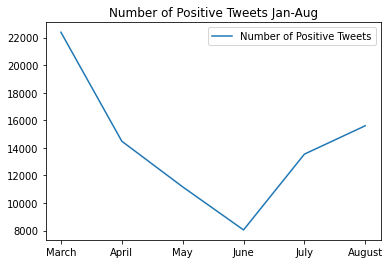

In [18]:
month_pos_graph = months_pos_sent.plot.line(title="Number of Positive Tweets Jan-Aug")
plt.xticks(months_pos_sent.index,months_pos_sent["month"].values)
num_tweets.set_xlabel("Sentiment")
num_tweets.set_ylabel("Number of Tweets")

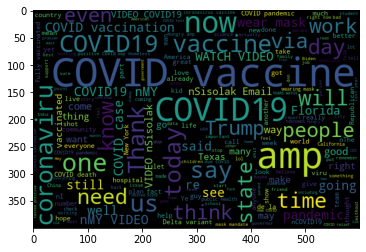

In [19]:
# Creating a word cloud
words = ' '.join([tweet for tweet in usa_2021_df['text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

# Dataset Pre-processing after Sentiment Analysis

3. Adding Sentiment Data to the vector.

In [20]:
date_mask = (usa_2021_df['date'] == '2021-03-01')
print(f"Number of tweets on March 01, 2021 is {date_mask.sum()}.")
positive_date_mask = date_mask & (usa_2021_df['sentiment'] == 'Positive')
print(f"Number of positive tweets on March 01, 2021 is {positive_date_mask.sum()}.")

Number of tweets on March 01, 2021 is 1555.
Number of positive tweets on March 01, 2021 is 666.


In [21]:
num_positive = []
num_negative = []
num_neutral = []
bucket_size = []
hourly = [[] for _ in range(24)]
weekday = []

for curr_date in tqdm(covid_df['date']):
    date_mask = (usa_2021_df['date'] == curr_date)
    bucket_size.append(date_mask.sum())
    # print(f"Number of tweets on {curr_date} is {date_mask.sum()}.")
    positive_date_mask = date_mask & (usa_2021_df['sentiment'] == 'Positive')
    negative_date_mask = date_mask & (usa_2021_df['sentiment'] == 'Negative')
    neutral_date_mask = date_mask & (usa_2021_df['sentiment'] == 'Neutral')
    # print(f"Number of positive tweets on {curr_date} is {positive_date_mask.sum()}.")
    num_positive.append(positive_date_mask.sum())
    num_negative.append(negative_date_mask.sum())
    num_neutral.append(neutral_date_mask.sum())
    for curr_hour in range(24):
        curr_hour_mask = date_mask & (usa_2021_df['hour_of_day'] == curr_hour)
        hourly[curr_hour].append(curr_hour_mask.sum())
    weekday.append(curr_date.dayofweek if curr_date.dayofweek != 0 else 7)

covid_df['num_positive'] = num_positive
covid_df['num_negative'] = num_negative
covid_df['num_neutral'] = num_neutral
covid_df['day_of_week'] = weekday
for curr_hour in range(24):
    covid_df[f"hour_{curr_hour}"] = hourly[curr_hour]

100%|██████████| 175/175 [00:21<00:00,  8.02it/s]


In [22]:
covid_df

,date,cases,deaths,new_cases,num_positive,num_negative,num_neutral,day_of_week,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
405,2021-03-01,28680857,514404,56696.0,666,265,624,7,51,62,67,55,41,33,16,14,6,9,21,41,59,57,73,94,97,122,108,90,116,110,105,108
406,2021-03-02,28738501,515710,57644.0,1135,645,1376,1,106,98,74,79,57,38,25,9,8,10,8,21,58,92,142,136,111,109,110,71,450,651,363,330
407,2021-03-03,28805113,518079,66612.0,1048,486,1230,2,215,203,189,151,115,75,51,23,16,18,16,51,74,116,119,138,156,139,111,128,184,149,184,143
408,2021-03-04,28872395,520028,67282.0,833,428,961,3,145,123,148,105,91,55,37,24,15,13,10,52,79,112,117,145,89,60,133,112,140,145,129,143
409,2021-03-05,28938090,522511,65695.0,886,395,946,4,121,119,115,103,73,52,25,34,14,13,13,43,94,127,149,176,148,102,122,117,102,125,116,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2021-08-18,37298285,624365,164611.0,821,413,1073,2,109,126,122,74,60,33,27,19,17,13,12,58,113,139,201,167,139,127,139,129,117,129,134,103
576,2021-08-19,37458037,626099,159752.0,682,329,892,3,101,101,83,66,60,31,31,12,14,17,16,55,76,98,102,122,90,108,109,139,100,116,119,137
577,2021-08-20,37657643,627631,199606.0,658,399,876,4,59,132,41,73,60,38,24,12,14,8,14,55,97,102,128,129,123,133,95,109,119,135,124,109
578,2021-08-21,37737034,628100,79391.0,517,316,747,5,101,121,98,73,59,43,19,14,7,11,20,47,64,79,100,108,77,82,53,86,88,70,89,71


In [23]:
relevant_columns = ['num_positive', 'num_negative', 'num_neutral', 'day_of_week'] + [f'hour_{i}' for i in range(24)]
x_data = torch.tensor(covid_df[relevant_columns].values, dtype=torch.float).t()
y_data = torch.tensor(covid_df['new_cases'].values, dtype=float).t()

In [24]:
x_data_np = x_data.numpy()
y_data_np = y_data.numpy()

# Regression using Sentiment Analysis

We aggregate sentiment analysis data to contain just numbers of positive, negative and neutral tweets on each day. We then perform linear regression to predict the number of infections on that day.

In [25]:
relevant_columns = ['num_positive', 'num_negative', 'num_neutral']

num_cols = len(relevant_columns)  # Postive, Negative, Neutral

A = torch.randn((1, num_cols), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

def layer_1(X):
    # print(X.shape)
    # print(A.shape)
    return A.mm(X) + b

def mlr_model(X):
    return layer_1(X)

def loss(y_predicted, y_target):
    return torch.sqrt(torch.mean((y_predicted - y_target) ** 2))

optimizer = torch.optim.Adam([A, b], lr=0.1)
num_epochs = 1000

curr_x = torch.tensor(covid_df[relevant_columns].values, dtype=torch.float).t()

x_train, x_test = curr_x[:, :int(x_data.shape[1] * 0.8)], curr_x[:, int(x_data.shape[1] * 0.8):]
y_train, y_test = y_data[:int(y_data.shape[0] * 0.8)], y_data[int(y_data.shape[0] * 0.8):]

with trange(num_epochs, desc="Training Multi-variable Linear Regression") as progress_bar:
    for _ in progress_bar:
        optimizer.zero_grad()
        y_pred = mlr_model(x_train)
        curr_loss = loss(y_pred, y_train)
        curr_loss.backward()
        optimizer.step()
        progress_bar.set_postfix(loss=curr_loss.data)
        # print(f"Epoch: {curr_epoch}, Loss: {curr_loss}")


Training Multi-variable Linear Regression: 100%|██████████| 1000/1000 [00:06<00:00, 155.71it/s, loss=tensor(16948.0449, dtype=torch.float64)]


(35,)


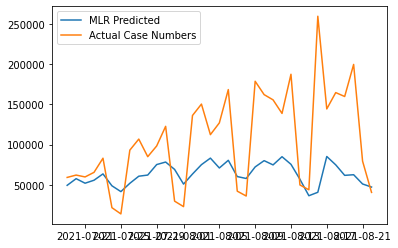

In [26]:
import matplotlib.pyplot as plt


mlr_pred = mlr_model(x_test)[0, :]
show_model_performance(mlr_pred, y_test, "MLR Predicted")
# mlr_pred = mlr_model(x_test)
mlr_rmse = loss(mlr_pred, y_test)
# plt.plot(covid_df.date, mlr_pred[0, :].detach().numpy(), label="MLR Predicted - WITH hour of day")
# # plt.plot(covid_df.date, temp_var, label="MLR Predicted - NO hour of day")
# plt.plot(covid_df.date, y_test.detach().numpy(), label="Actual Case Numbers")
# plt.legend()
# plt.show()

In [ ]:
mlr_rmse

# Time Series Models

Since new COVID-19 cases is a time series dataset, we try to fit time series models in this section to make predictions.

## ARIMA

In [33]:
arima_columns = ['date', 'new_cases']
arima_df = covid_df[arima_columns]
arima_df['date'] = pd.DatetimeIndex(arima_df['date']).month
arima_df = arima_df.set_index('date')
X_arima = arima_df.values

size_arima = int(len(X_arima) * 0.8)
train, test = X_arima[0:size_arima], X_arima[size_arima:len(X_arima)]

history = [x for x in train]
predictions_arima = list()
test = list(test)
# # walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions_arima.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))

In [34]:
arima_rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % arima_rmse)

Test RMSE: 58886.607


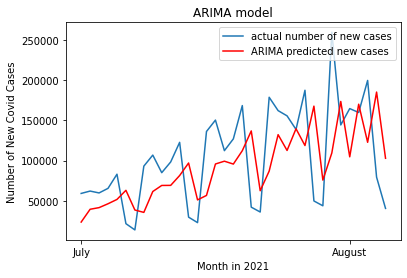

In [35]:
plt.plot(test)
plt.plot(predictions_arima, color='red')
legend1 = plt.legend(["actual number of new cases", "ARIMA predicted new cases"], loc=1)
labels = ['July', 'August']
x = [0, 30]
plt.title('ARIMA model')
plt.xticks(x, labels)
plt.ylabel("Number of New Covid Cases")
plt.xlabel("Month in 2021")
plt.show()

## OLS

In [36]:
ols_columns = ['new_cases', 'num_positive', 'num_negative',
       'num_neutral', 'day_of_week', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23']
ols_df = covid_df[ols_columns]
# train_ols, test_ols = train_test_split(ols_df, test_size=0.3)
train_ols = ols_df.head(int(0.8*ols_df.shape[0]))
test_ols = ols_df.tail(int(0.2*ols_df.shape[0]))
print(ols_df.shape)

X_train = train_ols[['num_positive', 'num_negative',
       'num_neutral', 'day_of_week', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23']].values
Y_train = train_ols['new_cases'].values

X_test = test_ols[['num_positive', 'num_negative',
       'num_neutral', 'day_of_week', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23']].values
y_test = test_ols['new_cases'].values

X_history_ols = [x for x in X_train]
Y_history_ols = [y for y in Y_train]
predictions_ols = []
for t in range(len(y_test)):
    model = OLS(Y_history_ols, X_history_ols).fit()
    # print(X_test[t].shape)
    pred = model.predict(X_test[t])[0]
    truth = y_test[t]
    predictions_ols.append(pred)
    X_history_ols.append(X_test[t])
    Y_history_ols.append(pred)
ols_rmse = sqrt(mean_squared_error(y_test, predictions_ols))
print('Test RMSE: %.3f' % ols_rmse)

(175, 29)
Test RMSE: 72963.371


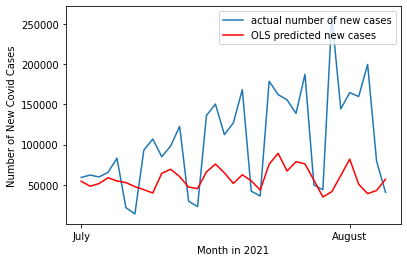

In [37]:
# show_model_performance(torch.tensor(predictions_ols), torch.tensor(y_test), "OLS Predictions")
plt.plot(y_test)
plt.plot(predictions_ols, color='red')
legend1 = plt.legend(["actual number of new cases", "OLS predicted new cases"], loc=1)
labels = ['July', 'August']
x = [0, 30]
plt.xticks(x, labels)
plt.ylabel("Number of New Covid Cases")
plt.xlabel("Month in 2021")
plt.show()

## Ensemble Method - ARIMA, OLS

In [38]:
X_history_em2 = [x for x in X_train]
Y_history_em2 = [y for y in Y_train]

model_ARIMA = ARIMA(Y_history_em2, order=(2, 0, 2)).fit()
pred_train_ARIMA = model_ARIMA.predict()
rmse_train_ARIMA = sqrt(mean_squared_error(Y_history_em2, pred_train_ARIMA))

model_OLS = OLS(Y_history_em2, X_history_em2).fit()
pred_train_OLS = model_OLS.predict(X_history_em2)
rmse_train_OLS = sqrt(mean_squared_error(Y_history_em2, pred_train_OLS))

w1 = 1 / rmse_train_ARIMA
w2 = 1 / rmse_train_OLS

em2_predictions = []
for t in range(len(y_test)):
    model_OLS = OLS(Y_history_em2, X_history_em2).fit()
    pred_OLS = model_OLS.predict(X_test[t])[0]

    model_ARIMA = ARIMA(Y_history_em2, order=(2, 0, 2)).fit()
    pred_ARIMA = model_ARIMA.forecast()[0]

    pred = (w1 * pred_ARIMA + w2 * pred_OLS) / (w1 + w2)
    em2_predictions.append(pred)
    X_history_em2.append(X_test[t])
    Y_history_em2.append(pred)

rmse_em2 = sqrt(mean_squared_error(y_test, em2_predictions))
print('Test RMSE: %.3f' % rmse_em2)

Test RMSE: 78597.784


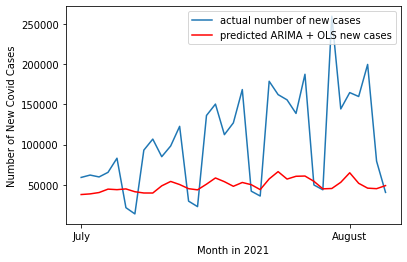

In [39]:
plt.plot(y_test)
plt.plot(em2_predictions, color='red')
legend1 = plt.legend(["actual number of new cases", "predicted ARIMA + OLS new cases"], loc=1)
labels = ['July', 'August']
x = [0, 30]
plt.xticks(x, labels)
plt.ylabel("Number of New Covid Cases")
plt.xlabel("Month in 2021")
plt.show()

## Ensemble Method - Linear Regression with Time Series Models

We run another experiment to check how would the time series models perform with the previously-tried linear regression model.

In [40]:
arima_columns = ['date', 'new_cases']
arima_df = covid_df[arima_columns]
arima_df['date'] = pd.DatetimeIndex(arima_df['date']).month
arima_df = arima_df.set_index('date')
X_arima = arima_df.values

size_arima = int(len(X_arima) * 0.7)
arima_train, test = X_arima[0:size_arima], X_arima[size_arima:len(X_arima)]
X_history_ols, X_test = x_data[: size_arima], x_data[size_arima:]

curr_x = torch.tensor(covid_df[relevant_columns].values, dtype=torch.float).t()

data_received = list(curr_x[:, :size_arima].numpy().T)
data_hidden = curr_x[:, size_arima:].numpy().T

history = list(Y_train[:size_arima])
test = list(test)

predictions = []
# # walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit()
	arima_pred = model_fit.forecast()[0][0]

	model = OLS(history, data_received).fit()
	# print(data_hidden[t].shape)
	ols_pred = model.predict(data_hidden[t])[0]
	if isinstance(ols_pred, np.ndarray):
		ols_pred = ols_pred[0]

	mlr_pred = mlr_model(torch.Tensor([data_hidden[t]]).t())
	
	# print((1 / arima_rmse) * arima_pred)
	# print(ols_pred)
	
	final_pred = ((1 / arima_rmse) * arima_pred + (1 / ols_rmse) * ols_pred + (1 / mlr_rmse) * mlr_pred) / (1 / arima_rmse + 1 / ols_rmse + 1 / mlr_rmse)
	# final_pred = ((1 / ols_rmse) * ols_pred + (1 / mlr_rmse) * mlr_pred) / (1 / ols_rmse + 1 / mlr_rmse)

	obs = test[t]
	history.append(obs)
	data_received.append(data_hidden[t])
 
	predictions.append(final_pred)
	# print('predicted=%f, expected=%f' % (final_pred, obs))


(53,)


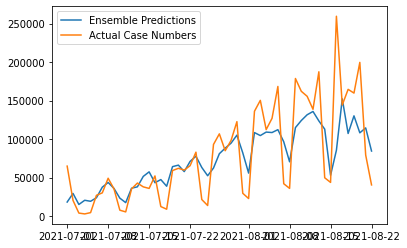

In [41]:
# print(len(predictions))
# print(len(test))
show_model_performance(torch.tensor(predictions), torch.tensor(test), "Ensemble Predictions")

In [42]:
ensemble_rmse = loss(torch.tensor(predictions), torch.tensor(test))
ensemble_rmse

tensor(72121.0149, dtype=torch.float64)

# Neural Network with Tweet Metadata and Sentiment Analysis Data

In [28]:
relevant_columns = ['num_positive', 'num_negative', 'num_neutral', 'day_of_week'] + [f'hour_{i}' for i in range(24)]

num_cols = len(relevant_columns)  # Postive, Negative, Neutral

A = torch.randn((20, num_cols), requires_grad=True)
b = torch.randn((20, 1), requires_grad=True)
C = torch.randn((1, 20), requires_grad=True)
d = torch.randn(1, requires_grad=True)

max_num = 0

def layer_1(X):
    # print(X.shape)
    # print(A.shape)
    return A.mm(X) + b

def layer_2(X):
    return C.mm(X) + d

def mlr_model(X):
    return layer_2(layer_1(X))

def loss(y_predicted, y_target):
    return torch.sqrt(torch.mean((y_predicted - y_target) ** 2))

def predict(X):
    initial_prediction = layer_2(layer_1(X))
    initial_prediction[initial_prediction < 0] = 0
    initial_prediction[initial_prediction > max_num + 50000] = max_num + 50000
    return initial_prediction

def reset_model():
    A = torch.randn((20, num_cols), requires_grad=True)
    b = torch.randn((20, 1), requires_grad=True)
    C = torch.randn((1, 20), requires_grad=True)
    d = torch.randn(1, requires_grad=True)
    max_num = 0

optimizer = torch.optim.Adam([A, b], lr=0.1)
num_epochs = 10
rolling_options = [7]
rolling_window_length = 21
forecast_options = [7]
forecast_window = 7

x_train, x_test = x_data[:, :int(x_data.shape[1] * 0.8)], x_data[:, int(x_data.shape[1] * 0.8):]
y_train, y_test = y_data[:int(y_data.shape[0] * 0.8)], y_data[int(y_data.shape[0] * 0.8):]

curr_loss = 0
num_items = 0

prediction_tracker = {}
target_y_tracker = {}
loss_tracker = {}

for rolling_window_length, forecast_window in list(itertools.product(rolling_options, forecast_options)):
    target_y = []
    predictions = []
    with trange(x_data.shape[1] - rolling_window_length - 2 * forecast_window - 1, desc="Training 21-day rolling MLR") as main_bar:
        # main_bar.set_postfix(rolling_window_length=rolling_window_length, forecast_window=forecast_window)
        for start_idx in main_bar:
            reset_model()
            curr_x = x_data[:, start_idx: start_idx + rolling_window_length]
            curr_y = y_data[start_idx + forecast_window: start_idx + forecast_window + rolling_window_length]
            # with trange(num_epochs, desc="Training Multi-variable Linear Regression") as progress_bar:
                # for _ in progress_bar:
            for _ in range(num_epochs):
                max_num = max(curr_y)
                optimizer.zero_grad()
                y_pred = mlr_model(curr_x)
                curr_loss = loss(y_pred, curr_y)
                curr_loss.backward()
                optimizer.step()
                # progress_bar.set_postfix(loss=curr_loss.data)
                # print(f"Epoch: {curr_epoch}, Loss: {curr_loss}")
            curr_pred = predict(x_data[:, start_idx + rolling_window_length + forecast_window: start_idx + rolling_window_length + forecast_window + 1])
            predictions.append(curr_pred[0])
            target_y.append(y_data[start_idx + 2 * forecast_window + rolling_window_length: start_idx + 2 * forecast_window + rolling_window_length + 1])
            overall_loss = loss(torch.tensor(predictions), torch.tensor(target_y))
            main_bar.set_postfix(loss=overall_loss, rolling_window_length=rolling_window_length, forecast_window=forecast_window)
    prediction_tracker[(rolling_window_length, forecast_window)] = predictions
    target_y_tracker[(rolling_window_length, forecast_window)] = target_y
    loss_tracker[(rolling_window_length, forecast_window)] = overall_loss


Training 21-day rolling MLR: 100%|██████████| 153/153 [00:02<00:00, 63.86it/s, forecast_window=7, loss=tensor(23975.8750, dtype=torch.float64), rolling_window_length=7]


(153,)


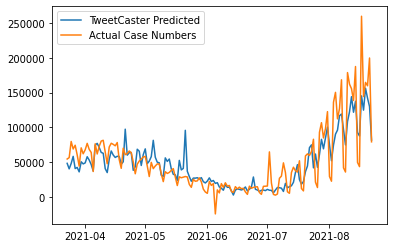

In [29]:
qualifying_entry = (7, 7)
predictions = prediction_tracker[qualifying_entry]
target_y = target_y_tracker[qualifying_entry]

show_model_performance(torch.tensor(predictions), torch.tensor(target_y), "TweetCaster Predicted")

(153,)


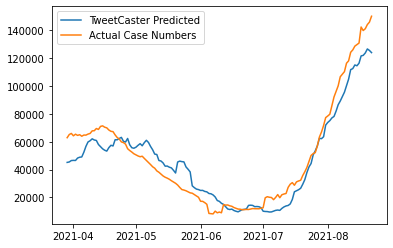

In [30]:
rolling_mean = covid_df['new_cases'].rolling(window=14).mean()
pred_df = pd.DataFrame(predictions).rolling(window=7).mean()
target_df = pd.DataFrame(target_y).rolling(window=7).mean()
pred_moving_avg_values = torch.tensor(pred_df.values)
target_moving_avg_values = torch.tensor(target_df.values)
show_model_performance(pred_moving_avg_values, target_moving_avg_values, "TweetCaster Predicted")

# Tweet Vectorization

This section covers experiments we run with tweet vectorization. The general idea is to check how does the information about the tweets themselves along with their metadata affect the predictions generated.

This section also tests how do the different types of encodings affect the kind of results produced. The ones we test in our work include,

1. TF-IDF with 200 features
2. TF-IDF with 500 features
3. BERTweet

Note: You may change the MAX_FEATURES variable to change the number of features that TF-IDF encoding generates.

In [31]:
# Parameter for TF-IDF vectorization
MAX_FEATURES = 200
# 1. TF-IDF vectorization using TweetTokenizer (ABANDONED)
def tfidf_vectorization_tweet_tokenizer(df, max_features):
    tt = TweetTokenizer(preserve_case=False)
    vector = TfidfVectorizer(
        sublinear_tf=True,
        max_features=max_features,
        token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
        tokenizer=tt.tokenize
    )
    X = vector.fit_transform(df['text'].values)
    X_col = vector.get_feature_names()
    feature_df = pd.DataFrame.sparse.from_spmatrix(X, columns=X_col)
    # feature_df['tweet_id'] = df['tweet_id']
    return feature_df

# Vectorized tweet using TF-IDF
vectorized_df = tfidf_vectorization_tweet_tokenizer(usa_2021_agg_df, MAX_FEATURES)

In [32]:
# 2. BERT
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def bert_vectorization(df, pre_trained_model):
    feature_df = pd.DataFrame()
    # feature_df['day_of_week'] = df['day_of_week']
    # feature_df['hour_of_day'] = df['hour_of_day']

    tokenizer = AutoTokenizer.from_pretrained(pre_trained_model, normalization=True)
    model = AutoModel.from_pretrained(pre_trained_model)
    sentences = list(df['text'].values)

    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    
    embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    return embeddings

    # feature_df['vector'] = list(embeddings)
    # return feature_df

BERTWEET_PRE_TRAINED = 'vinai/bertweet-base'
vectorized_emb = bert_vectorization(usa_2021_agg_df, BERTWEET_PRE_TRAINED)

Downloading:   0%|          | 0.00/558 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/517M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Neural Network with Tweet Encodings

In [43]:
num_cols = 768  # Postive, Negative, Neutral

A = torch.randn((20, num_cols), requires_grad=True)
b = torch.randn((20, 1), requires_grad=True)
C = torch.randn((1, 20), requires_grad=True)
d = torch.randn(1, requires_grad=True)

def layer_1(X):
    # print(A.shape)
    # print(X.shape)
    # print(b.shape)
    return A.mm(X) + b

def layer_2(X):
    return C.mm(X) + d

def mlr_model(X):
    return layer_2(layer_1(X))

def loss(y_predicted, y_target):
    return torch.sqrt(torch.mean((y_predicted - y_target) ** 2))

def predict(X):
    initial_prediction = layer_2(layer_1(X))
    initial_prediction[initial_prediction < 0] = 0
    initial_prediction[initial_prediction > max_num + 50000] = max_num + 50000
    return initial_prediction

def reset_model():
    A = torch.randn((20, num_cols), requires_grad=True)
    b = torch.randn((20, 1), requires_grad=True)
    C = torch.randn((1, 20), requires_grad=True)
    d = torch.randn(1, requires_grad=True)
    max_num = 0

optimizer = torch.optim.Adam([A, b], lr=0.1)
num_epochs = 500
rolling_options = [7]
rolling_window_length = 21
forecast_options = [7]
forecast_window = 7

overall_x = vectorized_emb.t()[:, -175:-7]
overall_y = y_data.t()[7:]

curr_loss = 0
num_items = 0

prediction_tracker = {}
target_y_tracker = {}
loss_tracker = {}

for rolling_window_length, forecast_window in list(itertools.product(rolling_options, forecast_options)):
    target_y = []
    predictions = []
    with trange(overall_x.shape[1] - rolling_window_length - 2 * forecast_window - 1, desc="Training 21-day rolling MLR") as main_bar:
        # main_bar.set_postfix(rolling_window_length=rolling_window_length, forecast_window=forecast_window)
        for start_idx in main_bar:
            reset_model()
            curr_x = overall_x[:, start_idx: start_idx + rolling_window_length]
            curr_y = overall_y[start_idx + forecast_window: start_idx + forecast_window + rolling_window_length]
            # with trange(num_epochs, desc="Training Multi-variable Linear Regression") as progress_bar:
                # for _ in progress_bar:
            for _ in range(num_epochs):
                max_num = max(curr_y)
                optimizer.zero_grad()
                y_pred = mlr_model(curr_x)
                curr_loss = loss(y_pred, curr_y)
                curr_loss.backward()
                optimizer.step()
                # progress_bar.set_postfix(loss=curr_loss.data)
                # print(f"Epoch: {curr_epoch}, Loss: {curr_loss}")
            curr_pred = predict(overall_x[:, start_idx + rolling_window_length + forecast_window: start_idx + rolling_window_length + forecast_window + 1])
            predictions.append(curr_pred[0])
            target_y.append(overall_y[start_idx + 2 * forecast_window + rolling_window_length: start_idx + 2 * forecast_window + rolling_window_length + 1])
            overall_loss = loss(torch.tensor(predictions), torch.tensor(target_y))
            main_bar.set_postfix(loss=overall_loss, rolling_window_length=rolling_window_length, forecast_window=forecast_window)
    prediction_tracker[(rolling_window_length, forecast_window)] = predictions
    target_y_tracker[(rolling_window_length, forecast_window)] = target_y
    loss_tracker[(rolling_window_length, forecast_window)] = overall_loss



# optimizer = torch.optim.Adam([A, b], lr=0.1)
# num_epochs = 5000

# x_train, x_test = x_data[:, :int(x_data.shape[1] * 0.8)], x_data[:, int(x_data.shape[1] * 0.8):]
# y_train, y_test = y_data[:int(y_data.shape[0] * 0.8)], y_data[int(y_data.shape[0] * 0.8):]
# overall_x = vectorized_emb.t()[:, -175:-7]
# overall_y = y_data.t()[7:]
# x_train, x_test = overall_x[:, :int(0.8 * overall_x.shape[1])], overall_x[:, int(0.8 * overall_x.shape[1]):]
# y_train, y_test = overall_y[:int(0.8 * overall_x.shape[1])], overall_y[int(0.8 * overall_x.shape[1]):]

# with trange(num_epochs, desc="Training Multi-variable Linear Regression") as progress_bar:
#     for _ in progress_bar:
#         optimizer.zero_grad()
#         y_pred = mlr_model(x_train)
#         curr_loss = loss(y_pred, y_train)
#         curr_loss.backward()
#         optimizer.step()
#         progress_bar.set_postfix(loss=curr_loss.data)
#         # print(f"Epoch: {curr_epoch}, Loss: {curr_loss}")


Training 21-day rolling MLR: 100%|██████████| 146/146 [00:58<00:00,  2.49it/s, forecast_window=7, loss=tensor(36177.2300, dtype=torch.float64), rolling_window_length=7]


(146,)


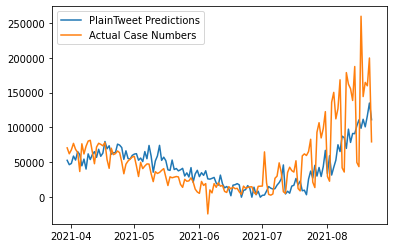

In [44]:
qualifying_entry = (7, 7)
predictions = prediction_tracker[qualifying_entry]
target_y = target_y_tracker[qualifying_entry]

show_model_performance(torch.tensor(predictions), torch.tensor(target_y), "PlainTweet Predictions")

(146,)


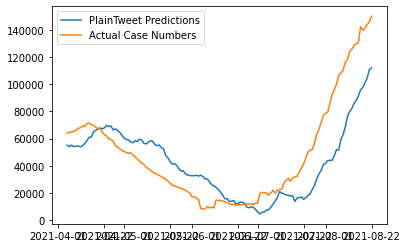

In [45]:
rolling_mean = covid_df['new_cases'].rolling(window=14).mean()
pred_df = pd.DataFrame(predictions).rolling(window=7).mean()
target_df = pd.DataFrame(target_y).rolling(window=7).mean()
pred_moving_avg_values = torch.tensor(pred_df.values)
target_moving_avg_values = torch.tensor(target_df.values)
show_model_performance(pred_moving_avg_values, target_moving_avg_values, "PlainTweet Predictions")

# TweetCaster: Neural Network with Tweet Encodings, Metadata and Sentiment Analysis Data

Currently assumes the vectorized tweets along with sentiment values as inputs. Note that the sentiment must be represented by an integer.

This section focuses on training the neural network to be able to predict the number of new COVID-19 cases seven days in the future. Please be sure to update the DIM_FEATURES before using this function. It must be set to the number of features + 28, if using TF-IDF, or 796, if using BERTweet.

Also, if you use BERTweet, please comment out line 4 in the code block below and un-comment line 5. If you use TF-IDF, please comment out line 5 in the code block below and un-comment line 4.

In [46]:
DIM_FEATURES = 796
num_cols = DIM_FEATURES

# combined_x = torch.vstack((torch.from_numpy(vectorized_df.values).float()[-x_data.shape[1]:, :].t(), x_data))  # if using TF-IDF, comment if using BERTweet
combined_x = torch.vstack((vectorized_emb.float()[-x_data.shape[1]:, :].t(), x_data))  # if using BERTweet, comment if using TF-IDF

A = torch.randn((20, num_cols), requires_grad=True)
b = torch.randn((20, 1), requires_grad=True)
C = torch.randn((1, 20), requires_grad=True)
d = torch.randn(1, requires_grad=True)

def layer_1(X):
    # print(A.shape)
    # print(X.shape)
    # print(b.shape)
    return A.mm(X) + b

def layer_2(X):
    return C.mm(X) + d

def mlr_model(X):
    return layer_2(layer_1(X))

def loss(y_predicted, y_target):
    return torch.sqrt(torch.mean((y_predicted - y_target) ** 2))

def predict(X):
    initial_prediction = layer_2(layer_1(X))
    initial_prediction[initial_prediction < 0] = 0
    initial_prediction[initial_prediction > max_num + 50000] = max_num + 50000
    return initial_prediction

def reset_model():
    A = torch.randn((20, num_cols), requires_grad=True)
    b = torch.randn((20, 1), requires_grad=True)
    C = torch.randn((1, 20), requires_grad=True)
    d = torch.randn(1, requires_grad=True)
    max_num = 0

optimizer = torch.optim.Adam([A, b], lr=0.1)
num_epochs = 10
rolling_options = [7, 14, 21, 28]
rolling_window_length = 21
forecast_options = [7]
forecast_window = 7

overall_x = combined_x[:, -175:-7]
overall_y = y_data.t()[7:]

curr_loss = 0
num_items = 0

prediction_tracker = {}
target_y_tracker = {}
loss_tracker = {}

for rolling_window_length, forecast_window in list(itertools.product(rolling_options, forecast_options)):
    target_y = []
    predictions = []
    with trange(overall_x.shape[1] - rolling_window_length - 2 * forecast_window - 1, desc="Training variable-day rolling BERTweet Neural Network") as main_bar:
        # main_bar.set_postfix(rolling_window_length=rolling_window_length, forecast_window=forecast_window)
        for start_idx in main_bar:
            reset_model()
            curr_x = overall_x[:, start_idx: start_idx + rolling_window_length]
            curr_y = overall_y[start_idx + forecast_window: start_idx + forecast_window + rolling_window_length]
            # with trange(num_epochs, desc="Training Multi-variable Linear Regression") as progress_bar:
                # for _ in progress_bar:
            for _ in range(num_epochs):
                max_num = max(curr_y)
                optimizer.zero_grad()
                y_pred = mlr_model(curr_x)
                curr_loss = loss(y_pred, curr_y)
                curr_loss.backward()
                optimizer.step()
                # progress_bar.set_postfix(loss=curr_loss.data)
                # print(f"Epoch: {curr_epoch}, Loss: {curr_loss}")
            curr_pred = predict(overall_x[:, start_idx + rolling_window_length + forecast_window: start_idx + rolling_window_length + forecast_window + 1])
            predictions.append(curr_pred[0])
            target_y.append(overall_y[start_idx + 2 * forecast_window + rolling_window_length: start_idx + 2 * forecast_window + rolling_window_length + 1])
            overall_loss = loss(torch.tensor(predictions), torch.tensor(target_y))
            main_bar.set_postfix(loss=overall_loss, rolling_window_length=rolling_window_length, forecast_window=forecast_window)
    prediction_tracker[(rolling_window_length, forecast_window)] = predictions
    target_y_tracker[(rolling_window_length, forecast_window)] = target_y
    loss_tracker[(rolling_window_length, forecast_window)] = overall_loss


Training variable-day rolling BERTweet Neural Network: 100%|██████████| 146/146 [00:02<00:00, 59.11it/s, forecast_window=7, loss=tensor(25638.7430, dtype=torch.float64), rolling_window_length=7]
Training variable-day rolling BERTweet Neural Network: 100%|██████████| 139/139 [00:02<00:00, 58.69it/s, forecast_window=7, loss=tensor(27250.5007, dtype=torch.float64), rolling_window_length=14]
Training variable-day rolling BERTweet Neural Network: 100%|██████████| 132/132 [00:02<00:00, 56.57it/s, forecast_window=7, loss=tensor(29189.2610, dtype=torch.float64), rolling_window_length=21]
Training variable-day rolling BERTweet Neural Network: 100%|██████████| 125/125 [00:02<00:00, 54.67it/s, forecast_window=7, loss=tensor(30958.1530, dtype=torch.float64), rolling_window_length=28]


(146,)


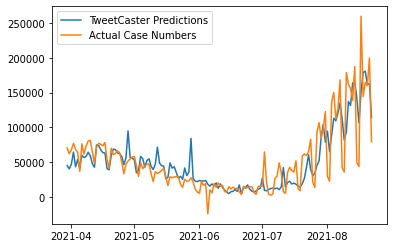

In [47]:
qualifying_entry = (7, 7)
predictions = prediction_tracker[qualifying_entry]
target_y = target_y_tracker[qualifying_entry]

show_model_performance(torch.tensor(predictions), torch.tensor(target_y), "TweetCaster Predictions")

(146,)


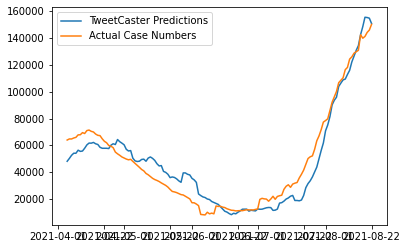

In [48]:
rolling_mean = covid_df['new_cases'].rolling(window=14).mean()
pred_df = pd.DataFrame(predictions).rolling(window=7).mean()
target_df = pd.DataFrame(target_y).rolling(window=7).mean()
pred_moving_avg_values = torch.tensor(pred_df.values)
target_moving_avg_values = torch.tensor(target_df.values)
show_model_performance(pred_moving_avg_values, target_moving_avg_values, "TweetCaster Predictions")